# Image Matrix, Histogramm
In this notebook, a matrix representing a satellite image of 8-bit values is turned into a histogram. The histogram visualizes the distribution of values, so that it is possible to see that the satellite image scene is coherent in its values. We expect to see clear clustering of values, indicating that most of the scene can be classified as one land use category like farming, water or as an urban area.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image_matrix = pd.read_csv("data/ImageMtrx.csv",delimiter=";",index_col="index")
image_matrix_random =pd.read_csv("data/ImageMtrx_random.csv",delimiter=";",index_col="index")
print("\n\nImage Matrix\n",image_matrix)
print("\n\nRandom Image Matrix\n",image_matrix_random)



Image Matrix
          A    B    C    D    E
index                         
1      181  175  151  118  117
2      179  175  172  148  108
3      166  165  179  176  127
4      178  175  180  186  162
5      188  185  181  181  184
6      183  180  183  181  184
7      175  182  193  190  174
8      181  188  189  181  166
9      182  185  175  166  168


Random Image Matrix
          A    B    C    D    E
index                         
1       96   81  211  102    9
2      154  232   84   21  225
3      122  200   60  180  251
4      211   70  157  244   44
5      171  242   74   53   88
6       14  189  242   56  184
7       94   80  141  162  144
8      217  115   30   70  147
9      127  214  129  161  181


In [9]:
"""DataFrame to numpy array"""
image_matrix_np = np.asarray(image_matrix)
image_matrix_random_np = np.asarray(image_matrix_random)
"""unpack nested list to flat list for hist() function"""
image_matrix_flatList = [item for sublist in image_matrix_np for item in sublist]
image_matrix_random_flatList = [item for sublist in image_matrix_random_np for item in sublist]

(0.0, 20.0)

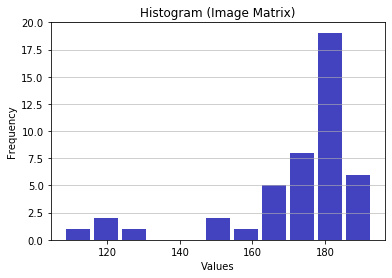

In [12]:
"""Graph Matrix"""
bins = np.arange(0, np.asarray(image_matrix_flatList).max() + 1.5) - 0.5

n, bins, patches = plt.hist(image_matrix_flatList, bins="auto", color='#0504aa', alpha=0.75, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram (Image Matrix)')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 10.0)

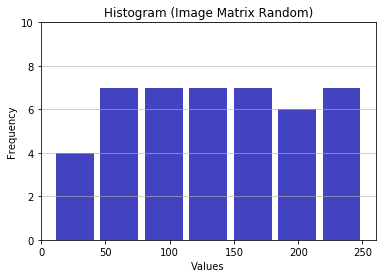

In [13]:
"""Graph Matrix Random"""
bins = np.arange(0, np.asarray(image_matrix_random_flatList).max() + 1.5) - 0.5

n, bins, patches = plt.hist(image_matrix_random_flatList, bins="auto", color='#0504aa', alpha=0.75, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram (Image Matrix Random)')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

As predicted, the "real" image shows two clusters, one around the 180 and one around the 120 mark. Values under 100 or over 200 are not present. This indicates that there is a spatial correlation between within the pixels of the image.
The random matrix on the other hand shows no clusters and a random districution of values, indicating that there is no spatial correlation within the image.